# **Importing lybraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.metrics import accuracy_score, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve


import warnings
warnings.filterwarnings('ignore')

#***Read Data***

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [6]:
df = df.drop_duplicates()
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#***Visualize Data***


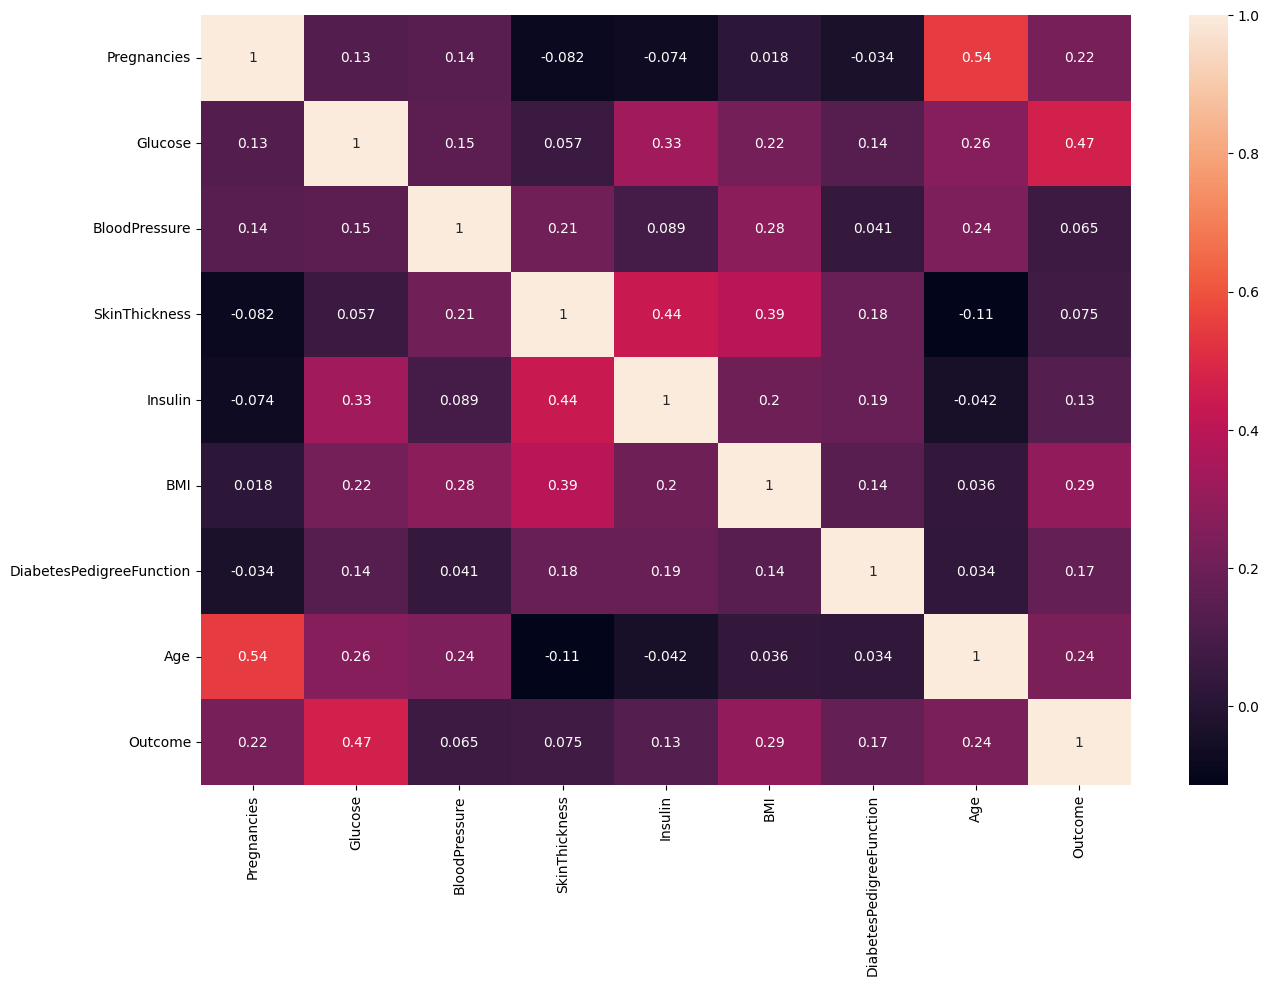

In [7]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot = True)
plt.show()

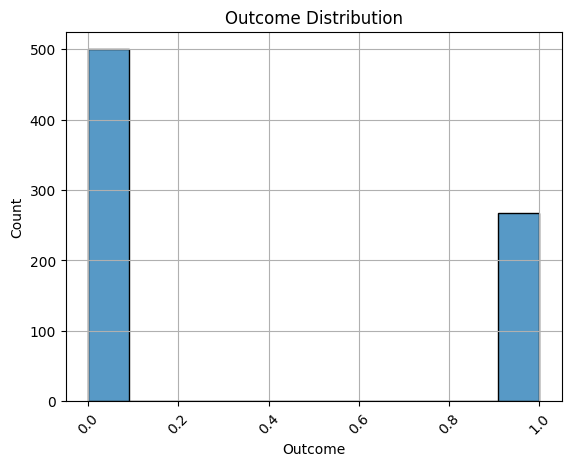

In [8]:
sns.histplot(df['Outcome'])
plt.title('Outcome Distribution')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.tick_params(axis='x', labelrotation=45)
plt.grid(True)

plt.show()

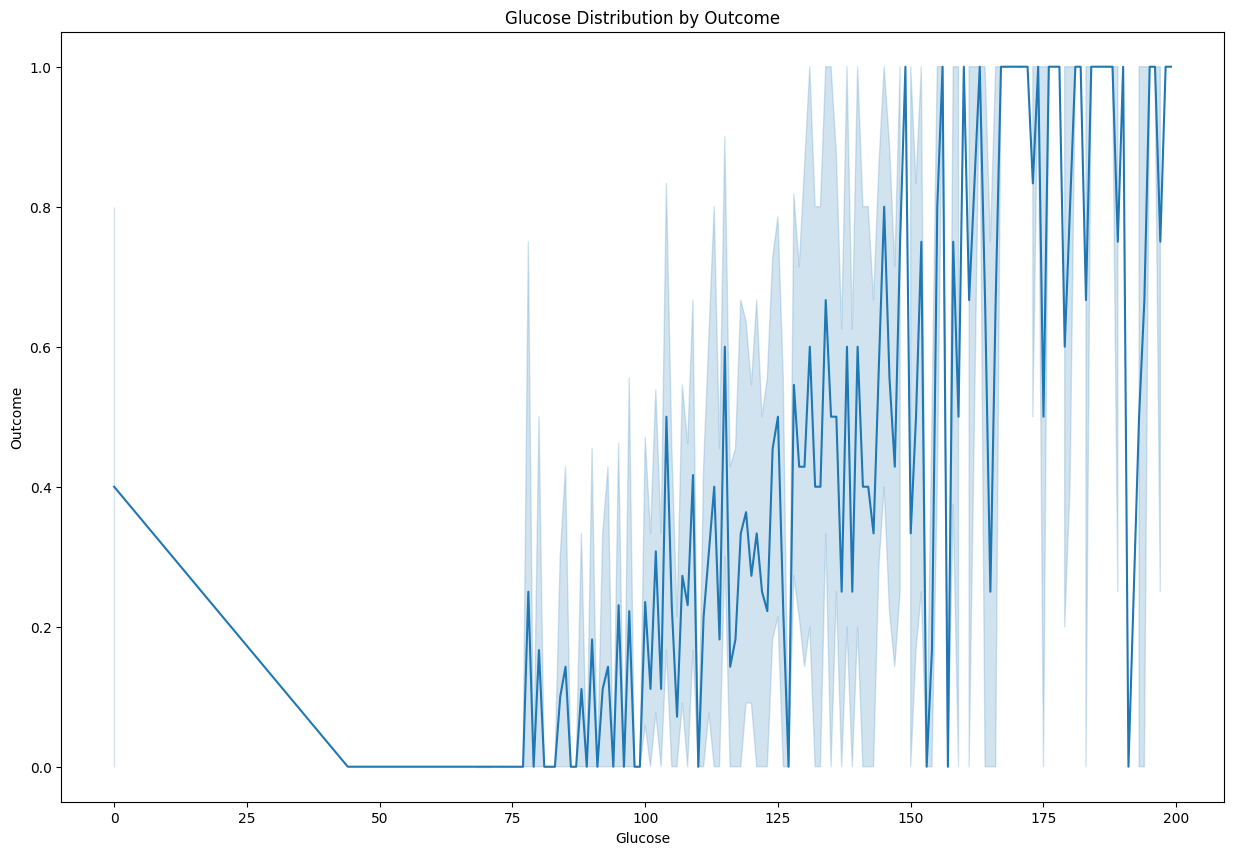

In [9]:
plt.figure(figsize=(15,10))
sns.lineplot( x='Glucose', y='Outcome', data=df)
plt.title('Glucose Distribution by Outcome')
plt.ylabel('Outcome')
plt.xlabel('Glucose')
plt.show()

#***Splitting Data***

In [10]:
x = df.drop('Outcome' , axis = 1)
y = df['Outcome']


# Splitting data to train and test data

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42)

#***Standrization***


In [11]:
scaler = StandardScaler()

# Store the original column names before transformation
original_columns = x_train.columns

# Apply standradScaler on x_train
x_train_scaled_array = scaler.fit_transform(x_train)
x_train_scaled = pd.DataFrame(x_train_scaled_array, columns=original_columns)

In [12]:
x_train_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.526397,-1.151398,-3.752683,-1.322774,-0.701206,-4.135256,-0.490735,-1.035940
1,1.588046,-0.276643,0.680345,0.233505,-0.701206,-0.489169,2.415030,1.487101
2,-0.828460,0.566871,-1.265862,-0.090720,0.013448,-0.424522,0.549161,-0.948939
3,-1.130523,1.254179,-1.049617,-1.322774,-0.701206,-1.303720,-0.639291,2.792122
4,0.681856,0.410665,0.572222,1.076490,2.484601,1.838121,-0.686829,1.139095
...,...,...,...,...,...,...,...,...
609,0.379793,0.566871,-0.292759,0.946800,0.504235,-0.437451,-0.172824,-0.600933
610,-0.828460,-0.776503,2.842797,-1.322774,-0.701206,-1.239073,-0.778934,-0.513932
611,1.890109,-0.620297,0.896590,1.076490,-0.701206,1.760544,1.981245,0.443084
612,-1.130523,0.629354,-3.752683,-1.322774,-0.701206,1.346804,-0.784877,-0.339929


In [13]:
# Apply standradScaler on x_test
x_test_scaled_array = scaler.fit_transform(x_test)
x_test_scaled = pd.DataFrame(x_test_scaled_array, columns=original_columns)

In [14]:
x_test_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.491242,-0.726678,-0.441476,0.667308,1.051919,0.233748,-0.170941,0.666612
1,-0.633683,-0.285349,0.318908,0.611305,-0.660221,0.435379,-1.086080,-1.073358
2,-0.633683,-0.411443,-0.173105,-1.180790,-0.660221,-0.145794,-1.053629,-1.073358
3,1.053704,-0.442966,0.542551,-1.180790,-0.660221,-0.881156,1.211504,-0.045194
4,0.772473,0.471215,0.989836,-1.180790,-0.660221,-0.252540,-0.884879,1.220238
...,...,...,...,...,...,...,...,...
149,1.334935,1.385396,0.900379,-1.180790,-0.660221,-0.193237,-0.586323,1.141149
150,-0.914915,-1.388671,-0.530933,0.499299,-0.155591,0.150723,2.493349,-0.836089
151,1.053704,-0.821248,0.184723,-1.180790,-0.660221,0.565847,0.007544,1.773865
152,-0.633683,0.786450,0.095266,0.947323,2.583834,-0.477893,-0.472742,-0.440642


#What is the Standrization ?

Standardization is a crucial data preprocessing technique used in statistics and machine learning. It transforms data to have a mean (average) of 0 and a standard deviation of 1.

This process is also often called "Z-score normalization" because the new values represent how many standard deviations away a data point is from the mean.


#Why the Standrization is important?

1- Puts Features on a Common Scale

2- Improves Algorithm Performance

3- Makes Interpretation Easier


#-----------------------------------------------------------------------------

# Build ***Logistic Regression*** model

In [15]:
logistic = LogisticRegression()

# Apply it on train data
logistic.fit(x_train_scaled , y_train)

LogisticRegression()

In [16]:
# Check the score of training
logistic.score(x_train_scaled , y_train)

0.7703583061889251

In [17]:
# predict the test data
pred_logistic = logistic.predict(x_test_scaled)
y_pred_proba_logistic = logistic.predict_proba(x_test_scaled)[:, 1]
pred_logistic

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [18]:
# Check the score of testing
accuracy_score(y_test , pred_logistic)

0.7857142857142857

In [19]:
accuracy_logistic = accuracy_score(y_test, pred_logistic)
roc_auc_logistic = roc_auc_score(y_test, y_pred_proba_logistic)

print(f"Accuracy: {accuracy_logistic:.4f}")
print(f"ROC AUC: {roc_auc_logistic:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, pred_logistic))

Accuracy: 0.7857
ROC AUC: 0.8165

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        99
           1       0.73      0.64      0.68        55

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154



#-----------------------------------------------------------------------------------

#Build ***Random Forest*** model

In [20]:
forest = RandomForestClassifier(random_state=42, n_estimators=100)

# Apply it on train data
forest.fit(x_train , y_train)

RandomForestClassifier(random_state=42)

In [21]:
# Check the score of training
forest.score(x_train , y_train)

1.0

In [22]:
# predict the test data
pred_forest = forest.predict(x_test)
y_pred_proba_forest = forest.predict_proba(x_test)[:, 1]
pred_forest

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [23]:
# predict the test data
pred_forest = forest.predict(x_test)
y_pred_proba_forest = forest.predict_proba(x_test)[:, 1]
pred_logistic

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [24]:
accuracy_score(y_test , pred_forest)

0.7207792207792207

In [25]:
accuracy_forest = accuracy_score(y_test , pred_forest)
roc_auc_forest = roc_auc_score(y_test, y_pred_proba_forest)

print(f"Accuracy: {accuracy_forest:.4f}")
print(f"ROC AUC: {roc_auc_forest:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, pred_forest))

Accuracy: 0.7208
ROC AUC: 0.8120

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



In [26]:
# Feature importance for Random Forest
feature_importance = pd.DataFrame({
    'Feature': x.columns,
    'Importance': forest.feature_importances_}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
                    Feature  Importance
1                   Glucose    0.258864
5                       BMI    0.169984
7                       Age    0.140931
6  DiabetesPedigreeFunction    0.123768
2             BloodPressure    0.088134
0               Pregnancies    0.076551
4                   Insulin    0.076122
3             SkinThickness    0.065646


#-----------------------------------------------------------------------------------

#Build ***SVM*** model

In [27]:
svm = SVC(random_state=42, probability=True)

# Apply it on train data
svm.fit(x_train_scaled , y_train)

SVC(probability=True, random_state=42)

In [28]:
# Check the score of training
svm.score(x_train_scaled , y_train)

0.8338762214983714

In [29]:
# predict the test data
pred_svm = svm.predict(x_test_scaled)
y_pred_proba_svm = svm.predict_proba(x_test_scaled)[:, 1]
pred_svm

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [30]:
accuracy_score(y_test , pred_svm)

0.7402597402597403

In [31]:
accuracy_svm = accuracy_score(y_test, pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_proba_svm)

print(f"Accuracy: {accuracy_svm:.4f}")
print(f"ROC AUC: {roc_auc_svm:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, pred_svm))

Accuracy: 0.7403
ROC AUC: 0.7985

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        99
           1       0.67      0.55      0.60        55

    accuracy                           0.74       154
   macro avg       0.72      0.70      0.70       154
weighted avg       0.73      0.74      0.73       154



#--------------------------------------------------------------------------------

In [32]:
results = {
    'Model': ['Logistic Regression', 'Random Forest', 'SVM'],
    'Accuracy': [accuracy_logistic, accuracy_forest, accuracy_svm],
    'ROC AUC': [roc_auc_logistic, roc_auc_forest, roc_auc_svm]
}

results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy   ROC AUC
0  Logistic Regression  0.785714  0.816529
1        Random Forest  0.720779  0.812029
2                  SVM  0.740260  0.798531


# Hyperparameter tuning with ***GridSearchCV***

# **frist :** Logistic Regression

In [33]:
logistic_param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'] # 'liblinear' solver supports both l1 and l2 penalties
}

grid_search = GridSearchCV(logistic, logistic_param_grid, cv=5,
                           scoring="accuracy", # Using accuracy as scoring for classification
                           return_train_score=True)

grid_search.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             return_train_score=True, scoring='accuracy')

In [34]:
best_logistic = grid_search.best_estimator_
best_logistic.score(x_test_scaled , y_test)

0.7792207792207793

#-------------------------------------------------------------------------------

#**second :** Logistic Regression

In [35]:
forest_param_grid = {
      'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(forest, forest_param_grid, cv=5,
                           scoring="accuracy", # Using accuracy as scoring for classification
                           return_train_score=True)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True, scoring='accuracy')

In [36]:
best_forest = grid_search.best_estimator_
best_forest.score(x_test , y_test)

0.7532467532467533

#--------------------------------------------------------------------------------

# **Third :** SVM

In [38]:
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf']
}

svm_grid = GridSearchCV(
    SVC(random_state=42, probability=True),
    param_grid=svm_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

svm_grid.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=1)

In [39]:
best_svm = grid_search.best_estimator_
best_svm.score(x_test_scaled , y_test)

0.6428571428571429

#-------------------------------------------------------------------------------

#***Real World Model***


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def build_and_train_model(df, model_type="logistic"):
    """
    Build, train, and evaluate a model on the diabetes dataset.

    Parameters:
        df (DataFrame): Input dataset
        model_type (str): "logistic", "random_forest", or "svm"

    Returns:
        model: trained model
    """
    # Features and target
    X = df.drop("Outcome", axis=1)
    y = df["Outcome"]

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Choose model
    if model_type == "logistic":
        model = LogisticRegression()
    elif model_type == "random_forest":
        model = RandomForestClassifier()
    elif model_type == "svm":
        model = SVC(probability=True)
    else:
        raise ValueError("Invalid model_type. Choose: logistic, random_forest, svm")

    # Train model
    model.fit(X_train, y_train)

    # Evaluate
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"{model_type} Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    return model, scaler


In [43]:
def predict_patient(model, scaler, patient_data):
    """
    Predict whether a patient is Diabetic or Non-Diabetic.

    Parameters:
        model: trained ML model
        scaler: fitted scaler (for preprocessing)
        patient_data (list or array): new patient data [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]

    Returns:
        str: Prediction result
    """
    # Convert input to 2D array (because sklearn expects 2D)
    patient_data = np.array(patient_data).reshape(1, -1)

    # Scale the data
    patient_data = scaler.transform(patient_data)

    # Make prediction
    prediction = model.predict(patient_data)[0]

    if prediction == 1:
        return "Diabetic"
    else:
        return "Non-Diabetic"

In [44]:
model, scaler = build_and_train_model(df, model_type="random_forest")

# Example patient data
new_patient = [6, 148, 72, 35, 0, 33.6, 0.627, 50]

result = predict_patient(model, scaler, new_patient)
print("Prediction:", result)

random_forest Accuracy: 0.7338
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79        99
           1       0.62      0.67      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.72       154
weighted avg       0.74      0.73      0.74       154

Confusion Matrix:
[[76 23]
 [18 37]]
Prediction: Diabetic
